Height of Image: 484 pixels
Width of Image:  1280 pixels


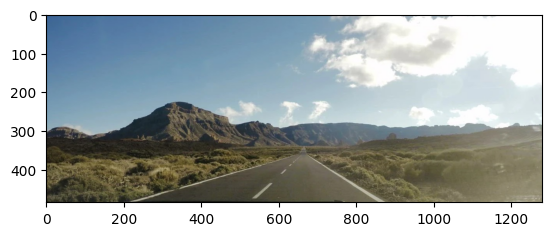

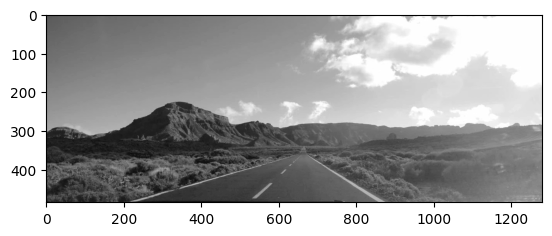

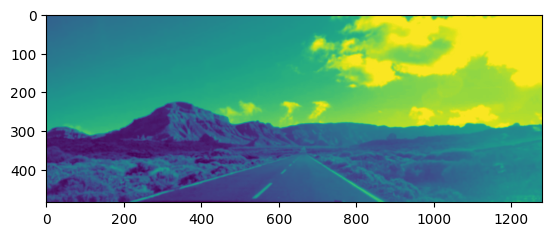

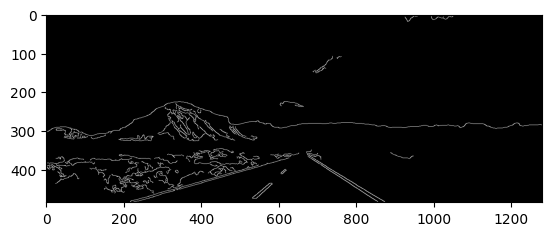

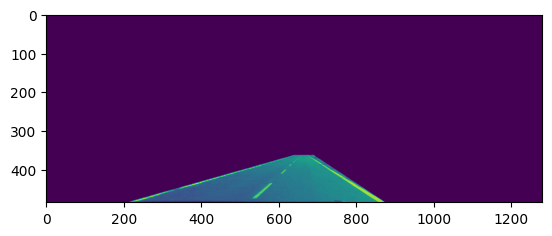

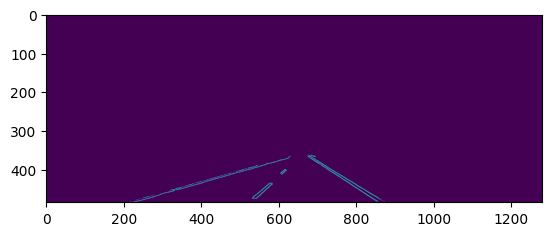

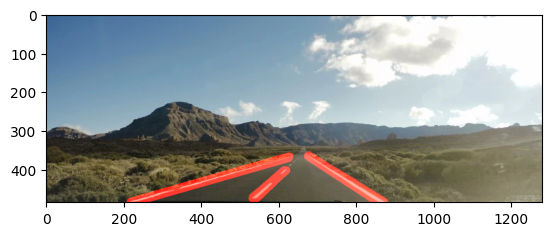

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load Image and Check Resolution
image_colour = mpimg.imread('Self_Driving_Car_3.jpg')
plt.figure()
plt.imshow(image_colour)
print ('Height of Image:', int(image_colour.shape[0]), 'pixels')
print ('Width of Image: ', int(image_colour.shape[1]), 'pixels')

image_width = image_colour.shape[1]
image_height = image_colour.shape[0]


# Show Image and Wait
# cv2.imshow('Self Driving Car!', image_colour)
# cv2.waitKey()
# cv2.destroyAllWindows()


# Convert Image to Greyscale
image_grey = cv2.cvtColor(image_colour, cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(image_grey, cmap = 'gray')
image_grey.shape


# Gaussian Blur
image_blurred = cv2.GaussianBlur(image_grey, (7, 7), 0) # Kernel size must consist of odd numbers
plt.figure()
plt.imshow(image_blurred)


# Canny Edge Detection
threshold_low = 10 #150 (Default: 10)
threshold_high = 140 #250 (Default: 200)
image_canny = cv2.Canny(image_blurred, threshold_low, threshold_high) # (Default: image_blurred)
plt.figure()
plt.imshow(image_canny, cmap = 'gray')

# Define Region of Interest
vertices = np.array([[(image_width/6, image_height), (image_width/2, image_height*9/12), (image_width/2+50, image_height*9/12), (image_width*4/6+20, image_height)]], dtype = np.int32)
mask = np.zeros_like(image_grey)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_grey, mask)
plt.figure()
plt.imshow(masked_image)

masked_image =cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)


# Hough Lines Detection and Draw Function
rho = 2 # Distance Resolution in Pixels
theta = np.pi/180 # Angular Resolution in Radians
threshold = 40 #100 # Minimum Number of Votes (Default: 40)
min_line_length = 50 #50 # Minimum Number of Pixels Making Up Line (Default: 100)
max_line_gap = 100 #300 # Maximum Gap in Pixels Between Connectable Line Segments (Default: 50)
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength = min_line_length, maxLineGap = max_line_gap)
                        
# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype = np.uint8)

for line in lines:
    for x1, y1, x2, y2 in line: # (x1, y1) = starting point of line; (x2, y2) = end point of line
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20) # For all lines, overlay in red, 20 pixels in thickness
lines

alpha = 1
beta = 1
gamma = 0

# Resultant weighted image is calculated as follows: original_image * alpha + image * beta + gamma
image_with_lines = cv2.addWeighted(image_colour, alpha, line_image, beta, gamma)
plt.figure()
plt.imshow(image_with_lines)





